In [52]:
import pandas as pd
import numpy as np
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords 

import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
dataset = pd.read_csv("/home/andrija/Desktop/customer_complaints/complaints-2017-12-08_11_01.csv")

In [55]:
# stopwords.words('english')

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["XXXX", 'XX', 'Wells', 'Fargo'])

## Word Clouds

In [25]:
?WordCloud

In [26]:
narrative = dataset['Consumer complaint narrative'].copy(deep=True)

issue = dataset['Issue'].copy(deep=True)

In [27]:
text = narrative[15]

text1 = issue[5]

In [28]:
wordcloud = WordCloud(max_font_size=100, max_words=200, width=1000, height=800,
                      stopwords=stopwords, background_color="white").generate(text)

wordcloud1 = WordCloud(max_font_size=100, max_words=200, width=1000, height=800,
                      stopwords=stopwords, background_color="white").generate(text1)

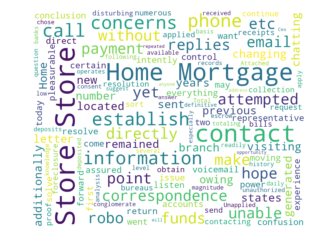

In [29]:
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

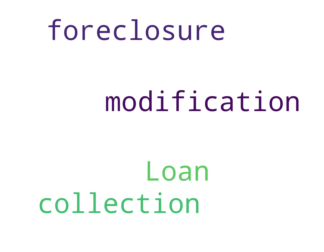

In [30]:
plt.imshow(wordcloud1, interpolation='bilinear')

plt.axis("off")
plt.show()

## Tokenization

In [31]:
# stop_words = set(stopwords.words('english'))
# stop_words.add('XXXX')

In [32]:
word_tokens = nltk.word_tokenize(text)

In [33]:
filtered_sentence = []

for w in word_tokens:
    if w not in stopwords:
        filtered_sentence.append(w)

In [34]:
print(filtered_sentence)

['In', 'previous', 'correspondence', 'replies', 'Home', 'Mortgage', ',', 'generated', 'robo', 'letter', 'states', ',', '``', 'unable', 'establish', 'contact', '``', '.', 'With', 'correspondence', 'sent', 'owing', 'home', '10', 'years', 'changing', 'phone', 'number', ',', 'email', ',', 'etc', '.', 'The', 'information', 'remained', ',', 'additionally', 'I', 'attempted', 'establish', 'contact', 'new', 'point', 'contact', '(', ')', '.', 'After', 'visiting', 'branch', ',', 'located', 'chatting', 'representative', '.', 'I', 'attempted', 'two', 'phone', 'calls', 'direct', '(', ')', ',', 'went', 'directly', 'voicemail', ',', 'without', 'return', 'phone', 'call', 'email', ',', 'etc', '.', 'I', 'come', 'conclusion', 'Home', 'Mortgage', 'want', 'solve', 'issue', 'I', 'may', 'resolve', 'confusion', 'accounts', '.', 'What', 'today', ',', 'listen', 'concerns', 'intently', 'assured', 'everything', 'power', 'control', 'make', 'certain', 'I', 'pleasurable', 'experience', 'moving', 'forward', '.', 'Sinc

## Stemming and Lemmatization

In [35]:
from nltk.stem import PorterStemmer

In [36]:
porter = PorterStemmer()

In [38]:
porter.stem(text)

'in previous correspondence and all replies from wells fargo home mortgage, the generated robo letter states, " wells fargo is unable to establish contact with me \'\'. with all correspondence sent and owing my home for over 10 years and not changing my phone number, email, etc. the information has remained the same, additionally i attempted to establish contact with my new point of contact ( xxxx xxxx ). after visiting the wells fargo branch on xxxx xxxx, located in xxxx and chatting with representative xxxx xxxx. i attempted two phone calls direct to ( xxxx ) xxxx at xxxx and xxxx, both went directly to voicemail, without a return phone call and or email, etc. i have come to the conclusion that wells fargo home mortgage does not want to solve any issue that i may have and or resolve any confusion on my accounts. what xxxx xxxx did do today, was listen to concerns intently and assured me that he would do everything in his power and control to make certain that i have a pleasurable exp

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
wordnet_lemmatizer = WordNetLemmatizer()

In [42]:
wordnet_lemmatizer.lemmatize(text)

'In previous correspondence and all replies from Wells Fargo Home Mortgage, the generated robo letter states, " Wells Fargo is unable to establish contact with me \'\'. With all correspondence sent and owing my home for over 10 years and not changing my phone number, email, etc. The information has remained the same, additionally I attempted to establish contact with my new point of contact ( XXXX XXXX ). After visiting the Wells Fargo branch on XXXX XXXX, located in XXXX and chatting with representative XXXX XXXX. I attempted two phone calls direct to ( XXXX ) XXXX at XXXX and XXXX, both went directly to voicemail, without a return phone call and or email, etc. I have come to the conclusion that Wells Fargo Home Mortgage does not want to solve any issue that I may have and or resolve any confusion on my accounts. What XXXX XXXX did do today, was listen to concerns intently and assured me that he would do everything in his power and control to make certain that I have a pleasurable exp

## Clean Text Class

In [45]:
import string
from sklearn.base import BaseEstimator, TransformerMixin